In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import aux_functions as f

In [2]:
df = pd.read_csv("data/df_clean_all.csv", index_col = None)
df['date_time'] = pd.to_datetime(df['date_time'])

In [3]:
df = df.reset_index(drop=True)

In [4]:
df.columns

Index(['Unnamed: 0', 'client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth',
       'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth', 'generation', 'testing_engagement', 'balance_level',
       'tenure', 'Variation', 'visitor_id', 'visit_id', 'process_step',
       'date_time'],
      dtype='object')

In [5]:
df = df.drop(columns='Unnamed: 0')

In [6]:
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317118,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
317119,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51
317120,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40
317121,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11


## 1. Who are the primary clients using this online process?

In [7]:
df_control = df[df['Variation']== 'Control']
df_test = df[df['Variation']== 'Test']

In [8]:
df_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time
11,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16
12,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53
13,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04
14,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31
15,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317097,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,confirm,2017-04-12 19:06:55
317098,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_3,2017-04-12 19:05:14
317099,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_2,2017-04-12 19:04:29
317100,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_1,2017-04-12 19:04:07


In [9]:
frequency_table_control, proportion_table_control, frequency_table_test, proportion_table_test = f.create_frequency_table(df_control, df_test, 'gendr')

C:\Users\Carlota\AppData\Local\Temp\ipykernel_19016\270614438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_control.index, y=frequency_table_control.values, palette="Set3");
C:\Users\Carlota\AppData\Local\Temp\ipykernel_19016\270614438.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_test.index, y=frequency_table_test.values, palette="Set3");


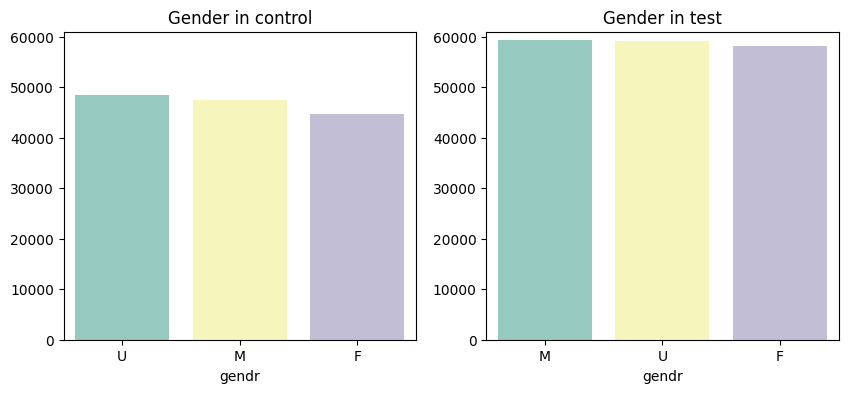

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=frequency_table_control.index, y=frequency_table_control.values, palette="Set3");
plt.ylim([0,61000])
plt.title('Gender in control')
plt.subplot(1,2,2)
sns.barplot(x=frequency_table_test.index, y=frequency_table_test.values, palette="Set3");
plt.ylim([0,61000])
plt.title('Gender in test')
plt.show()

In [11]:
# Frequency table for 'generation'
frequency_table_generation_test = df_test['generation'].value_counts()
# Calculating the proportion of each unique value in the 'Generation'
proportion_table_generation_test = df_test['generation'].value_counts(normalize=True)
frequency_table_generation_test, proportion_table_generation_test

(generation
 boomers         76496
 millennials     30371
 X generation    28651
 Z generation    27390
 70+             13733
 Name: count, dtype: int64,
 generation
 boomers         0.433059
 millennials     0.171936
 X generation    0.162199
 Z generation    0.155060
 70+             0.077745
 Name: proportion, dtype: float64)

In [12]:
# Frequency table for 'generation'
frequency_table_generation_control = df_control['generation'].value_counts()
# Calculating the proportion of each unique value in the 'Generation'
proportion_table_generation_control = df_control['generation'].value_counts(normalize=True)
frequency_table_generation_control, proportion_table_generation_control

(generation
 boomers         59322
 millennials     24793
 X generation    23406
 Z generation    22426
 70+             10535
 Name: count, dtype: int64,
 generation
 boomers         0.422275
 millennials     0.176485
 X generation    0.166612
 Z generation    0.159636
 70+             0.074992
 Name: proportion, dtype: float64)

In [13]:
frequency_table_generation_control, proportion_table_generation_control, frequency_table_generation_test, proportion_table_generation_test = f.create_frequency_table(df_control, df_test, 'generation')

C:\Users\Carlota\AppData\Local\Temp\ipykernel_19016\3191112310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_generation_control.index, y=frequency_table_generation_control.values, palette="Set3");
C:\Users\Carlota\AppData\Local\Temp\ipykernel_19016\3191112310.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_generation_test.index, y=frequency_table_generation_test.values, palette="Set3");


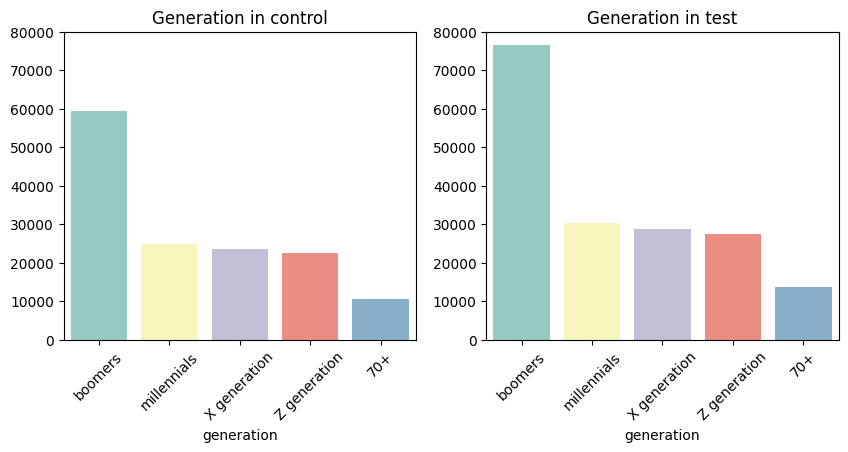

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=frequency_table_generation_control.index, y=frequency_table_generation_control.values, palette="Set3");
plt.ylim([0,80000])
plt.xticks(rotation=45)
plt.title('Generation in control')
plt.subplot(1,2,2)
sns.barplot(x=frequency_table_generation_test.index, y=frequency_table_generation_test.values, palette="Set3");
plt.ylim([0,80000])
plt.xticks(rotation=45)
plt.title('Generation in test')
plt.show()

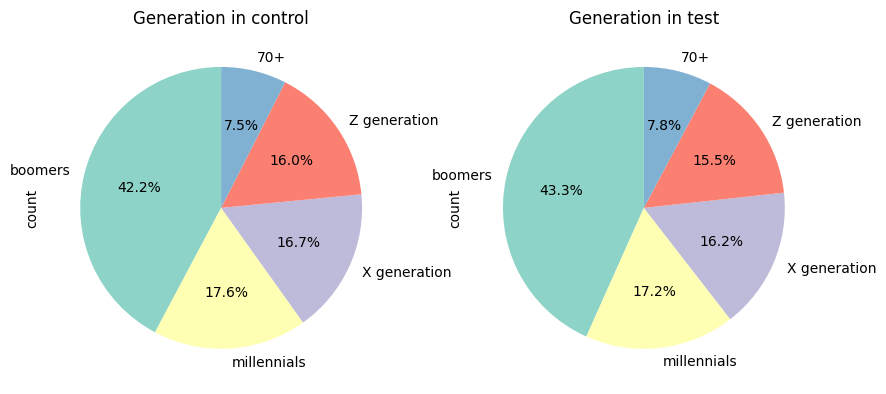

In [15]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
frequency_table_generation_control.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Generation in control')
plt.subplot(1,2,2)
frequency_table_generation_test.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Generation in test')
plt.show()

In [16]:
df_control.shape[0], df_test.shape[0]

(140482, 176641)

### 2. Are the primary clients younger or older, new or long-standing?

In [17]:
frequency_table_tenure_control, proportion_table_tenure_control, frequency_table_tenure_test, proportion_table_tenure_test = f.create_frequency_table(df_control, df_test, 'tenure')

In [18]:
frequency_table_tenure_control

tenure
5-10     52172
10-15    32295
20-50    23684
15-20    21863
0-5      10421
+50         47
Name: count, dtype: int64

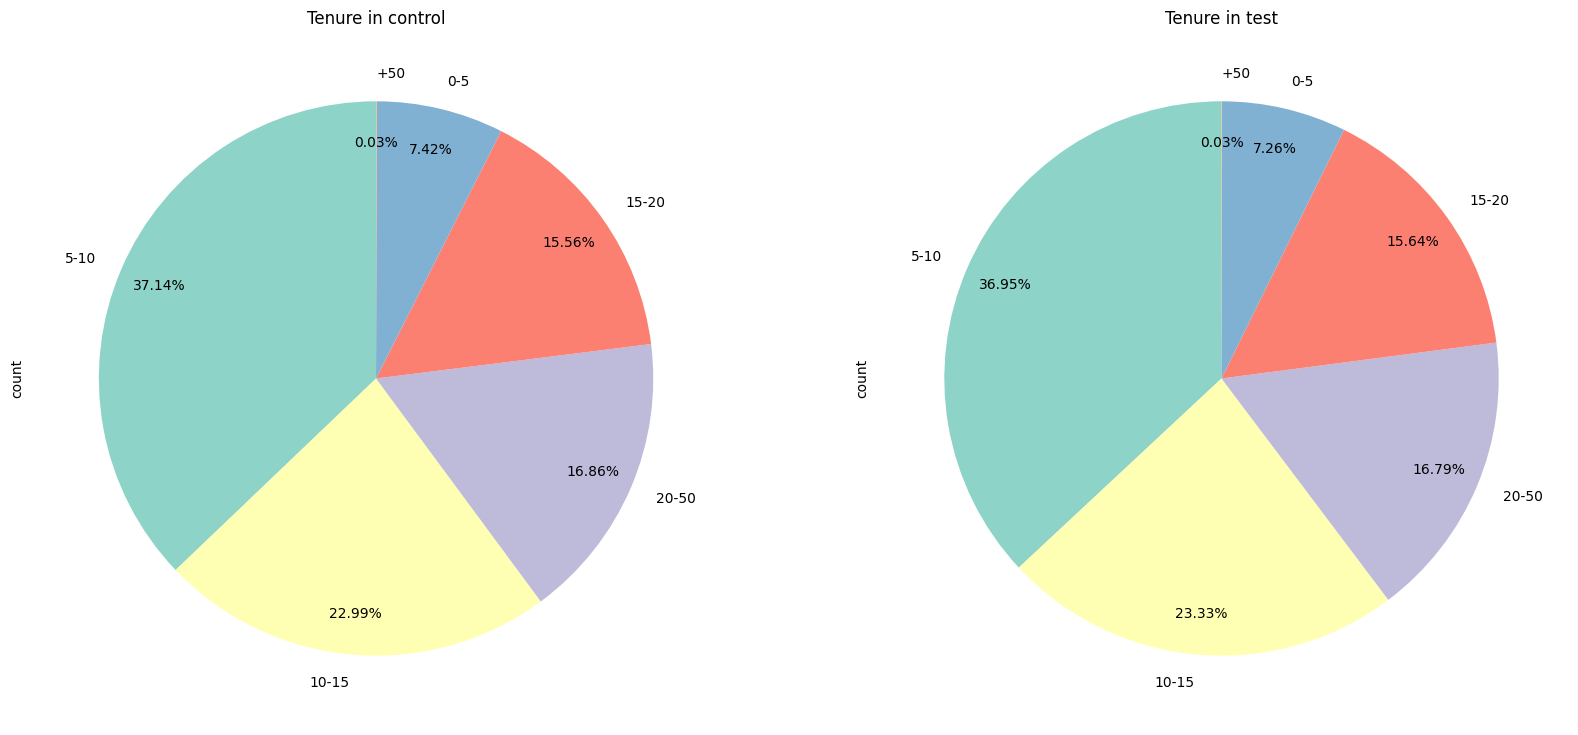

In [19]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
frequency_table_tenure_control.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1  )

plt.title('Tenure in control')
plt.subplot(1,2,2)
frequency_table_tenure_test.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1 )
plt.title('Tenure in test')
plt.show()

In [20]:
df_control.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'generation',
       'testing_engagement', 'balance_level', 'tenure', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')

In [21]:
frequency_table_balance_level_control, proportion_table_balance_level_control, frequency_table_balance_level_test, proportion_table_balance_level_test = f.create_frequency_table(df_control, df_test, 'balance_level')

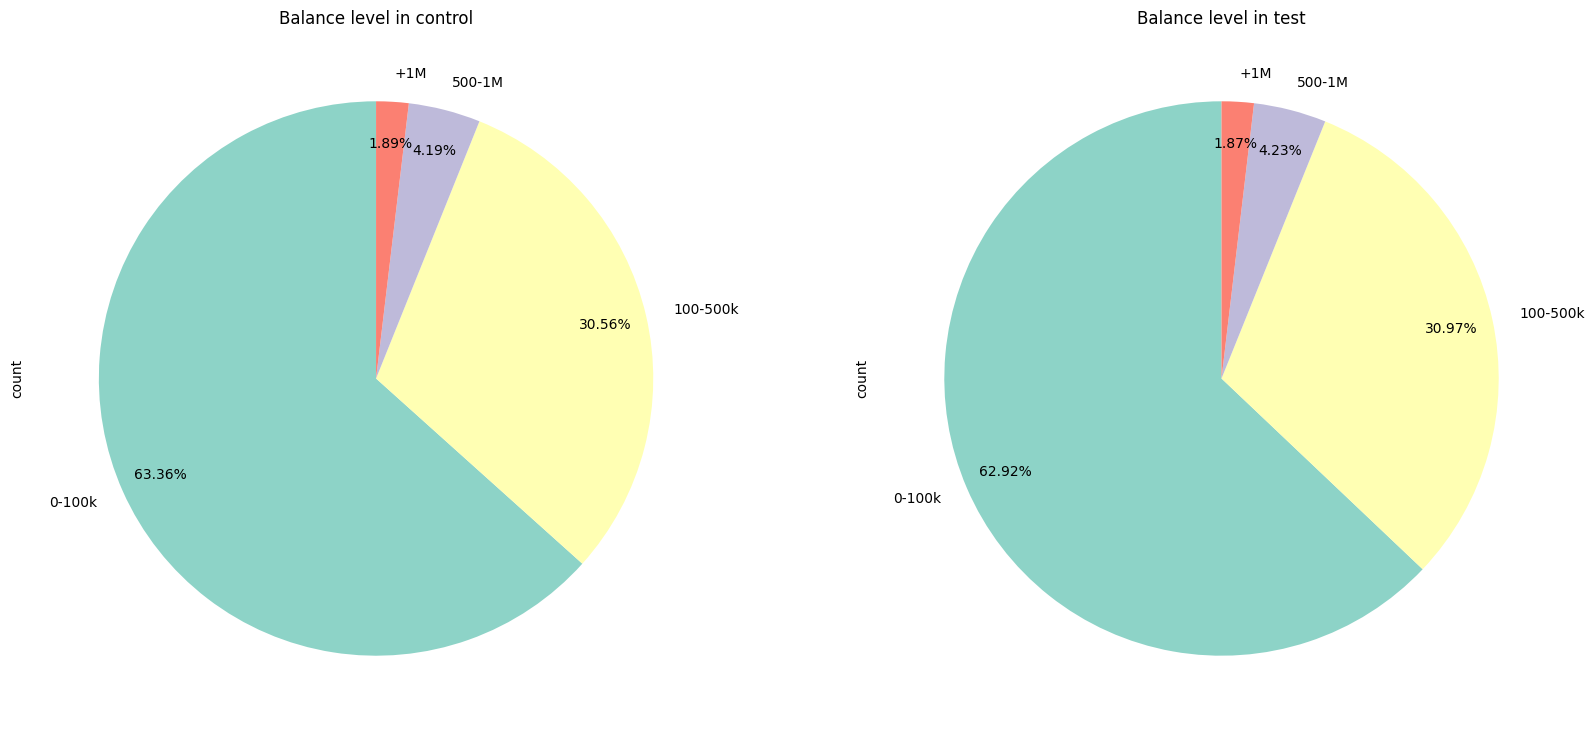

In [22]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
frequency_table_balance_level_control.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1  )

plt.title('Balance level in control')
plt.subplot(1,2,2)
frequency_table_balance_level_test.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1 )
plt.title('Balance level in test')
plt.show()

In [23]:
clientes_control = df_control['client_id'].tolist()
clientes_test = df_test['client_id'].tolist()

both_experiments = []

for i in clientes_control:
    if i in clientes_test: 
        both_experiments.append(i)

KeyboardInterrupt: 

In [ ]:
both_experiments

[]

In [50]:
df_control.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'generation',
       'testing_engagement', 'balance_level', 'tenure', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')

In [31]:
df_pasos_1 = df_control.groupby(['client_id', 'visit_id', 'process_step'], as_index= False).agg({'date_time':['min', 'max']})
df_pasos_1

KeyboardInterrupt: 

In [ ]:
df_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time
11,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16
12,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53
13,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04
14,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31
15,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317097,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,confirm,2017-04-12 19:06:55
317098,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_3,2017-04-12 19:05:14
317099,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_2,2017-04-12 19:04:29
317100,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_1,2017-04-12 19:04:07


In [ ]:
def time_custom(group):
    if group.name == 'start':
        return group.min()
    else:
        return group.max()
    
    

In [ ]:
df_control[['visit_id', 'process_step', 'date_time']].sort_values(by = ['visit_id', 'process_step']).head(15)

,visit_id,process_step,date_time
148115,100030127_47967100085_936361,start,2017-03-22 11:07:49
226760,100037962_47432393712_705583,start,2017-04-14 16:44:03
226762,100037962_47432393712_705583,start,2017-04-14 16:43:16
226763,100037962_47432393712_705583,start,2017-04-14 16:41:51
226761,100037962_47432393712_705583,step_1,2017-04-14 16:43:55
136962,100057941_88477660212_944512,start,2017-04-09 11:30:10
136958,100057941_88477660212_944512,step_1,2017-04-09 11:33:21
136961,100057941_88477660212_944512,step_1,2017-04-09 11:30:40
136957,100057941_88477660212_944512,step_2,2017-04-09 11:33:58
136960,100057941_88477660212_944512,step_2,2017-04-09 11:31:50


In [ ]:
df_control_pasos = df_control.groupby(
    ['client_id', 'visit_id', 'process_step'], as_index=False
).agg({'date_time': time_custom})
df_control_pasos

,client_id,visit_id,process_step,date_time
0,1028,557292053_87239438319_391157,start,2017-04-08 18:51:28
1,1028,557292053_87239438319_391157,step_1,2017-04-08 19:00:26
2,1028,557292053_87239438319_391157,step_2,2017-04-08 19:00:17
3,1028,557292053_87239438319_391157,step_3,2017-04-08 18:58:04
4,1104,543158812_46395476577_767725,start,2017-06-12 07:49:18
...,...,...,...,...
109132,9998346,189177304_69869411700_783154,start,2017-03-29 15:25:00
109133,9998346,189177304_69869411700_783154,step_1,2017-03-29 15:29:55
109134,9998346,189177304_69869411700_783154,step_2,2017-03-29 15:30:11
109135,9998346,189177304_69869411700_783154,step_3,2017-03-29 15:37:28


In [ ]:
#df_control_pasos = df_control_pasos.sort_values(by=['client_id', 'visit_id','process_step','date_time'])

#df_control_pasos['time_diff'] = df_control_pasos.groupby(['client_id', 'visit_id'])['date_time'].diff()
#df_control_pasos = df_control_pasos.sort_values(by=['client_id', 'visit_id', 'date_time', 'process_step'])
#df_control_pasos

#df_control_pasos = df_control_pasos.sort_values(by=['client_id', 'visit_id', 'process_step', 'date_time'])
# Asegúrate de que 'date_time' está en formato datetime
df_control_pasos['date_time'] = pd.to_datetime(df_control_pasos['date_time'])

# Ordenar los datos
df_control_pasos = df_control_pasos.sort_values(by=['client_id', 'visit_id', 'process_step', 'date_time'])

# Calcular la diferencia de tiempo
df_control_pasos['time_diff'] = df_control_pasos.groupby(['client_id', 'visit_id'])['date_time'].diff()

# Si deseas eliminar filas con 'NaT' en 'time_diff'
df_control_pasos = df_control_pasos.dropna(subset=['time_diff'])

# Ver los resultados
df_control_pasos

,client_id,visit_id,process_step,date_time,time_diff
2,1028,557292053_87239438319_391157,step_2,2017-04-08 19:00:17,-1 days +23:59:51
3,1028,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,-1 days +23:57:47
9,1186,795373564_99931517312_810896,step_2,2017-04-08 18:05:24,0 days 00:00:11
12,1195,393817425_39015278493_996341,step_1,2017-04-05 20:15:59,0 days 00:00:33
13,1195,393817425_39015278493_996341,step_2,2017-04-05 20:17:37,0 days 00:01:38
...,...,...,...,...,...
109128,9997470,761490147_96352537762_21814,step_2,2017-05-09 16:38:37,0 days 00:00:03
109129,9997470,761490147_96352537762_21814,step_3,2017-05-09 16:39:16,0 days 00:00:39
109133,9998346,189177304_69869411700_783154,step_1,2017-03-29 15:29:55,0 days 00:04:55
109134,9998346,189177304_69869411700_783154,step_2,2017-03-29 15:30:11,0 days 00:00:16


In [ ]:
# Ordenar los datos por 'client_id' y 'step'
#busqueda_sorted_max_min_hours = busqueda_sorted_max_min_hours.sort_values(by=['visit_id', 'process_step'])

# Crear una nueva columna con la diferencia entre el 'max' de un paso y el 'min' del siguiente paso
#busqueda_sorted_max_min_hours['time_to_next_step'] = busqueda_sorted_max_min_hours.groupby('visit_id')['in_step'].shift(-1) - busqueda_sorted_max_min_hours['out_step']

# Ver el resultado
#busqueda_sorted_max_min_hours

# Agrupamos por 'client_id', 'visit_id' y 'process_step'
#busqueda_sorted_max_min_hours = busqueda_sorted.groupby(['client_id', 'visit_id', 'process_step']).agg(in_step=('time', 'min'), out_step=('time', 'max')).reset_index()

# Calcular el tiempo de espera como la diferencia entre la hora final e inicial
#busqueda_sorted_max_min_hours['time_each_step'] = busqueda_sorted_max_min_hours['out_step'] - busqueda_sorted_max_min_hours['in_step']

# Mostrar los resultados
#busqueda_sorted_max_min_hours

In [9]:
df_test_no_repetition = f.no_repetition(df_test)
df_control_no_repetition = f.no_repetition(df_control)

In [10]:
df_test_no_repetition

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
3,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
5,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_1,2017-04-02 11:21:38
6,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317116,8739285,19.0,229.0,69.5,F,2,44994.24,1.0,4.0,boomers,low,0-100k,15-20,Test,8756552_54841419737,101846948_96925910026_299041,start,2017-04-12 14:49:47
317117,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_3,2017-03-30 23:59:33
317118,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
317119,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51


In [10]:
# Test completion rate for test group
df_test = df[df["Variation"] == "Test"]
df_test[df_test["process_step"] == "confirm"]
df_test['repetition'] = df_test.duplicated(subset=["visit_id", "process_step"], keep="last")
df_test
df_test_no_repetition = df_test[df_test['repetition'] == False]
df_test_no_repetition
df_test_confirm = df_test_no_repetition[df_test_no_repetition["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
round(df_test_confirm.shape[0]/df_test.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

C:\Users\Carlota\AppData\Local\Temp\ipykernel_6644\675165737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['repetition'] = df_test.duplicated(subset=["visit_id", "process_step"], keep="last")


69.1

In [11]:
completation_rate_test = f.step_rate(df_test, 'confirm')
completation_rate_test

69.29

In [12]:
completation_rate_test_no_rep = f.step_rate(df_test_no_repetition, 'confirm')
completation_rate_test_no_rep

69.22

In [13]:
completation_rate_control = f.step_rate(df_control, 'confirm')
completation_rate_control

65.58

In [14]:
completation_rate_control_no_rep = f.step_rate(df_control_no_repetition, 'confirm')
completation_rate_control_no_rep

65.58

In [15]:
# Test completion rate for test group
df_control = df[df["Variation"] == "Control"]
df_control[df_control["process_step"] == "confirm"]
df_control['repetition'] = df_control.duplicated(subset=["visit_id", "process_step"], keep="last")
df_control
df_control_no_repetition = df_control[df_control['repetition'] == False]
df_control_no_repetition
df_control_confirm = df_control_no_repetition[df_control_no_repetition["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
round(df_control_confirm.shape[0]/df_control.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

C:\Users\Carlota\AppData\Local\Temp\ipykernel_6644\24486171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['repetition'] = df_control.duplicated(subset=["visit_id", "process_step"], keep="last")


65.4

### 2. Time Spent on Each Step: The average duration users spend on each step

In [16]:
df_control_no_repetition.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'generation',
       'testing_engagement', 'balance_level', 'tenure', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time', 'repetition'],
      dtype='object')

In [17]:
df_control_no_repetition[['client_id', 'visit_id', 'process_step', 'date_time']].sort_values(by=['visit_id', 'date_time', 'client_id'])

,client_id,visit_id,process_step,date_time
148115,105007,100030127_47967100085_936361,start,2017-03-22 11:07:49
226763,5623007,100037962_47432393712_705583,start,2017-04-14 16:41:51
226761,5623007,100037962_47432393712_705583,step_1,2017-04-14 16:43:55
136962,4823947,100057941_88477660212_944512,start,2017-04-09 11:30:10
136961,4823947,100057941_88477660212_944512,step_1,2017-04-09 11:30:40
...,...,...,...,...
96143,4064969,999985675_64610694964_443659,start,2017-04-20 09:45:18
96142,4064969,999985675_64610694964_443659,step_1,2017-04-20 09:46:26
96141,4064969,999985675_64610694964_443659,step_2,2017-04-20 09:47:04
96140,4064969,999985675_64610694964_443659,step_3,2017-04-20 09:48:45


In [18]:
df_control_no_repetition.dtypes

client_id                      int64
clnt_tenure_yr               float64
clnt_tenure_mnth             float64
clnt_age                     float64
gendr                         object
num_accts                      int64
bal                          float64
calls_6_mnth                 float64
logons_6_mnth                float64
generation                    object
testing_engagement            object
balance_level                 object
tenure                        object
Variation                     object
visitor_id                    object
visit_id                      object
process_step                  object
date_time             datetime64[ns]
repetition                      bool
dtype: object

In [19]:
df_control_tiempo = f.time_spent_each_step(df_control_no_repetition)
df_control_tiempo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time,repetition,time_spent
298528,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,low,100-500k,10-15,Control,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,False,NaT
298527,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,low,100-500k,10-15,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,False,0 days 00:00:49
298525,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,low,100-500k,10-15,Control,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,False,0 days 00:01:12
298524,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,low,100-500k,10-15,Control,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,False,0 days 00:04:35
130633,1104,5.0,66.0,48.0,U,3,154643.94,6.0,9.0,X generation,low,100-500k,5-10,Control,194240915_18158000533,543158812_46395476577_767725,start,2017-06-12 07:49:18,False,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141088,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,low,100-500k,+50,Control,292425655_16607136645,189177304_69869411700_783154,step_1,2017-03-29 15:26:02,False,0 days 00:01:02
141087,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,low,100-500k,+50,Control,292425655_16607136645,189177304_69869411700_783154,step_2,2017-03-29 15:26:47,False,0 days 00:00:45
141084,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,low,100-500k,+50,Control,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:28:00,False,0 days 00:01:13
141080,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,low,100-500k,+50,Control,292425655_16607136645,189177304_69869411700_783154,confirm,2017-03-29 15:37:28,False,0 days 00:09:28


In [22]:
df_control_tiempo[(df_control_tiempo['process_step'] == 'start' )& (df_control_tiempo['time_spent'] == '0 days 00:09:48')]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time,repetition,time_spent
128127,138093,14.0,169.0,56.0,F,2,111851.95,5.0,8.0,boomers,low,100-500k,10-15,Control,816789777_66173189856,783423709_88615762378_262005,start,2017-05-30 14:17:44,False,0 days 00:09:48
184059,3090130,6.0,83.0,60.5,U,2,373823.10,6.0,9.0,boomers,low,100-500k,5-10,Control,50737853_79309347117,664560887_88852207384_721516,start,2017-04-12 13:03:14,False,0 days 00:09:48


In [23]:
df_control_tiempo[df_control_tiempo['visit_id'] == '783423709_88615762378_262005']

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time,repetition,time_spent
128125,138093,14.0,169.0,56.0,F,2,111851.95,5.0,8.0,boomers,low,100-500k,10-15,Control,816789777_66173189856,783423709_88615762378_262005,step_1,2017-05-30 14:03:01,False,NaT
128124,138093,14.0,169.0,56.0,F,2,111851.95,5.0,8.0,boomers,low,100-500k,10-15,Control,816789777_66173189856,783423709_88615762378_262005,step_2,2017-05-30 14:03:24,False,0 days 00:00:23
128123,138093,14.0,169.0,56.0,F,2,111851.95,5.0,8.0,boomers,low,100-500k,10-15,Control,816789777_66173189856,783423709_88615762378_262005,step_3,2017-05-30 14:07:56,False,0 days 00:04:32
128127,138093,14.0,169.0,56.0,F,2,111851.95,5.0,8.0,boomers,low,100-500k,10-15,Control,816789777_66173189856,783423709_88615762378_262005,start,2017-05-30 14:17:44,False,0 days 00:09:48


In [24]:
df[df['visit_id'] == '783423709_88615762378_262005']

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time
128123,138093,14.0,169.0,56.0,F,2,111851.95,5.0,8.0,boomers,low,100-500k,10-15,Control,816789777_66173189856,783423709_88615762378_262005,step_3,2017-05-30 14:07:56
128124,138093,14.0,169.0,56.0,F,2,111851.95,5.0,8.0,boomers,low,100-500k,10-15,Control,816789777_66173189856,783423709_88615762378_262005,step_2,2017-05-30 14:03:24
128125,138093,14.0,169.0,56.0,F,2,111851.95,5.0,8.0,boomers,low,100-500k,10-15,Control,816789777_66173189856,783423709_88615762378_262005,step_1,2017-05-30 14:03:01
128126,138093,14.0,169.0,56.0,F,2,111851.95,5.0,8.0,boomers,low,100-500k,10-15,Control,816789777_66173189856,783423709_88615762378_262005,start,2017-05-30 14:02:39
128127,138093,14.0,169.0,56.0,F,2,111851.95,5.0,8.0,boomers,low,100-500k,10-15,Control,816789777_66173189856,783423709_88615762378_262005,start,2017-05-30 14:17:44


In [83]:

df_control_tiempo = df_control_no_repetition.sort_values(by=['client_id', 'visit_id', 'date_time'])
df_control_tiempo['time_spent'] = df_control_tiempo.groupby('visit_id')['date_time'].diff()
df_control_tiempo[['client_id', 'visit_id', 'process_step', 'date_time', 'time_spent']].tail(33)

,client_id,visit_id,process_step,date_time,time_spent
93264,9996711,200256953_19881035574_656660,start,2017-04-21 19:09:21,NaT
93263,9996711,200256953_19881035574_656660,step_1,2017-04-21 19:09:53,0 days 00:00:32
93262,9996711,200256953_19881035574_656660,step_2,2017-04-21 19:10:53,0 days 00:01:00
93261,9996711,200256953_19881035574_656660,step_3,2017-04-21 19:14:41,0 days 00:03:48
93260,9996711,200256953_19881035574_656660,confirm,2017-04-21 19:20:47,0 days 00:06:06
303670,9996877,713500557_31297619237_860300,start,2017-05-03 18:08:32,NaT
64516,9997114,19940015_3197786491_51650,start,2017-04-14 20:16:33,NaT
64515,9997114,19940015_3197786491_51650,step_1,2017-04-14 20:17:02,0 days 00:00:29
64514,9997114,19940015_3197786491_51650,step_2,2017-04-14 20:18:26,0 days 00:01:24
64513,9997114,19940015_3197786491_51650,step_3,2017-04-14 20:20:26,0 days 00:02:00


In [75]:
df_control_tiempo.dtypes

client_id                       int64
clnt_tenure_yr                float64
clnt_tenure_mnth              float64
clnt_age                      float64
gendr                          object
num_accts                       int64
bal                           float64
calls_6_mnth                  float64
logons_6_mnth                 float64
generation                     object
testing_engagement             object
balance_level                  object
tenure                         object
Variation                      object
visitor_id                     object
visit_id                       object
process_step                   object
date_time              datetime64[ns]
repetition                       bool
time_spent            timedelta64[ns]
dtype: object

In [84]:
avg_time_per_step_control = df_control_tiempo.groupby('process_step')['time_spent'].mean()
avg_time_per_step_control

process_step
confirm   0 days 00:02:46.738609583
start               0 days 00:10:43
step_1    0 days 00:01:01.407514450
step_2    0 days 00:00:48.819996997
step_3    0 days 00:01:52.314501877
Name: time_spent, dtype: timedelta64[ns]

In [27]:
df_test_tiempo = f.time_spent_each_step(df_test_no_repetition)
df_test_tiempo


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time,repetition,time_spent
252082,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,low,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,False,NaT
252081,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,low,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,False,0 days 00:00:07
252080,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,low,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,False,0 days 00:00:32
252079,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,low,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,False,0 days 00:01:39
252078,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,low,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,False,0 days 00:00:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306138,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,low,100-500k,10-15,Test,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,False,0 days 00:00:21
306133,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,low,100-500k,10-15,Test,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,False,NaT
306132,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,low,100-500k,10-15,Test,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,False,0 days 00:00:15
50558,9999832,23.0,281.0,49.0,F,2,431887.61,1.0,4.0,X generation,low,100-500k,20-50,Test,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,False,NaT


In [30]:
avg_time_per_step_test = f.mean_time_spent(df_test_tiempo)
avg_time_per_step_test

process_step
confirm   0 days 00:02:25.773403849
start     0 days 00:08:10.553516819
step_1    0 days 00:00:52.309504147
step_2    0 days 00:01:13.718273902
step_3    0 days 00:01:48.584083329
Name: time_spent, dtype: timedelta64[ns]

### 3. **Error Rates:** If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [9]:
df_control_error = f.transform_to_errores(df_control)
percentage_error_control = f.percentage_errors(df_control_error)
percentage_error_control

c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['step_order'] = df['process_step'].map(step_order)


Percentage of errors : 6.852123403710084


np.float64(6.852123403710084)

In [10]:
df_test_error = f.transform_to_errores(df_test)
percentage_error_test = f.percentage_errors(df_test_error)
percentage_error_test

c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['step_order'] = df['process_step'].map(step_order)


Percentage of errors : 9.223226770681778


np.float64(9.223226770681778)

#### Error rate per category

In [11]:
df_control.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'generation',
       'testing_engagement', 'balance_level', 'tenure', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time', 'step_order'],
      dtype='object')

#### 1. Gender

In [12]:
avg_gendr_control = f.mean_errors_per_category(df_control_error, 'gendr')
avg_gendr_control
avg_gendr_test = f.mean_errors_per_category(df_test_error, 'gendr')
avg_gendr_test

Error rate per gendr: gendr
F    0.068498
M    0.063967
U    0.073001
Name: is_error, dtype: float64
Error rate per gendr: gendr
F    0.099469
M    0.089495
U    0.087862
Name: is_error, dtype: float64


gendr
F    0.099469
M    0.089495
U    0.087862
Name: is_error, dtype: float64

c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


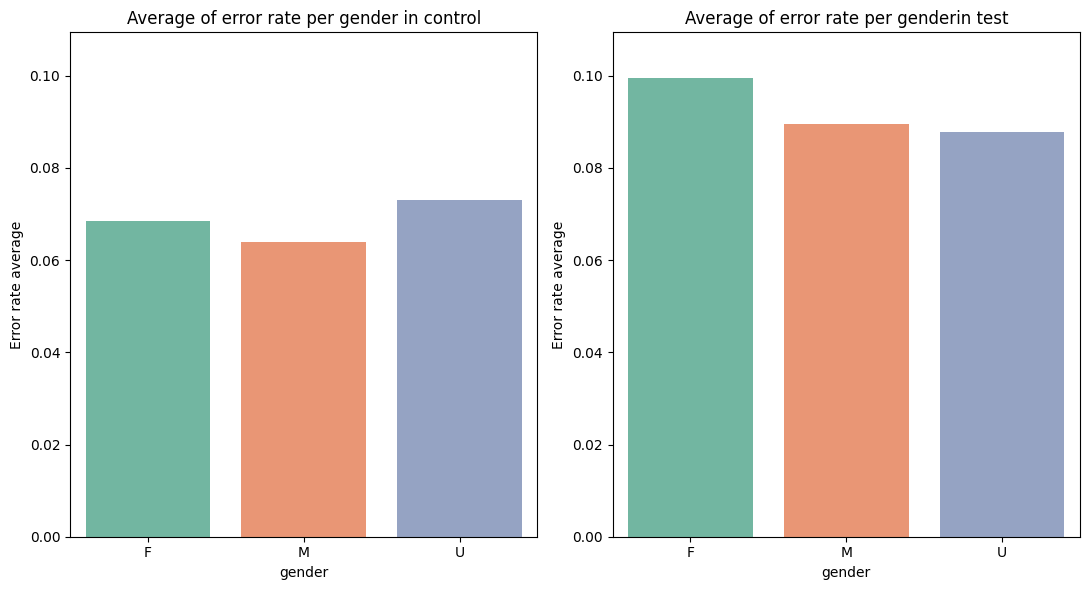

In [13]:
f.create_barplot_error(avg_gendr_control, avg_gendr_test, 'gender')

#### 2. Generation

In [14]:
avg_generation_control = f.mean_errors_per_category(df_control_error, 'generation')
avg_generation_control
avg_generation_test = f.mean_errors_per_category(df_test_error, 'generation')
avg_generation_test

Error rate per generation: generation
70+             0.081728
X generation    0.064770
Z generation    0.066753
boomers         0.072165
millennials     0.059331
Name: is_error, dtype: float64
Error rate per generation: generation
70+             0.125683
X generation    0.081952
Z generation    0.072764
boomers         0.105796
millennials     0.070199
Name: is_error, dtype: float64


generation
70+             0.125683
X generation    0.081952
Z generation    0.072764
boomers         0.105796
millennials     0.070199
Name: is_error, dtype: float64

c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


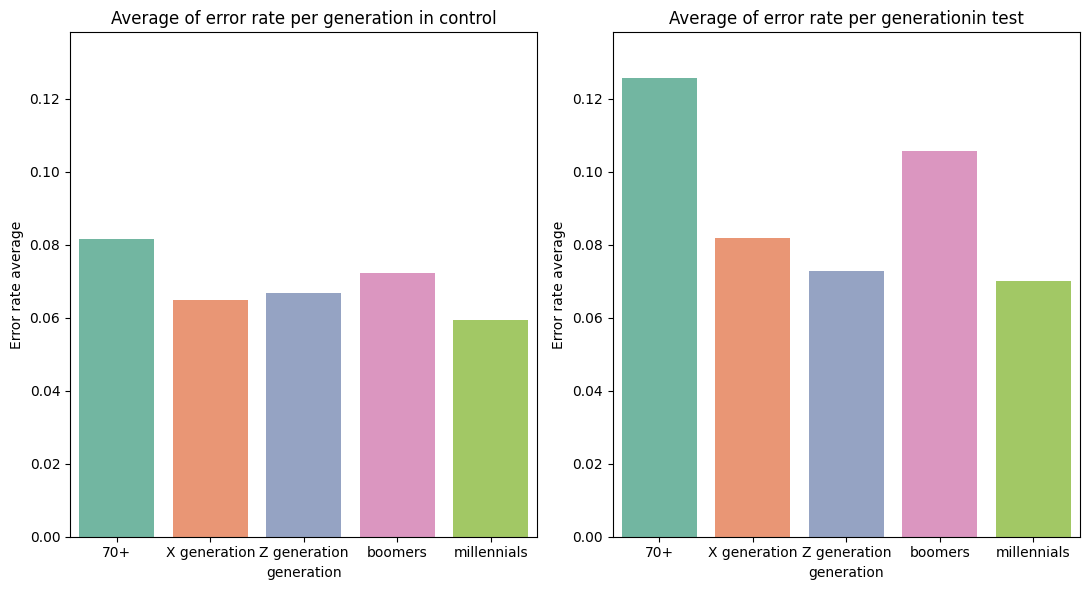

In [15]:
f.create_barplot_error(avg_generation_control, avg_generation_test, 'generation')

In [16]:
df_control.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'generation',
       'testing_engagement', 'balance_level', 'tenure', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time', 'step_order'],
      dtype='object')

Error rate per testing_engagement: testing_engagement
high    0.060945
low     0.068565
Name: is_error, dtype: float64
Error rate per testing_engagement: testing_engagement
high    0.067476
low     0.092337
Name: is_error, dtype: float64


c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


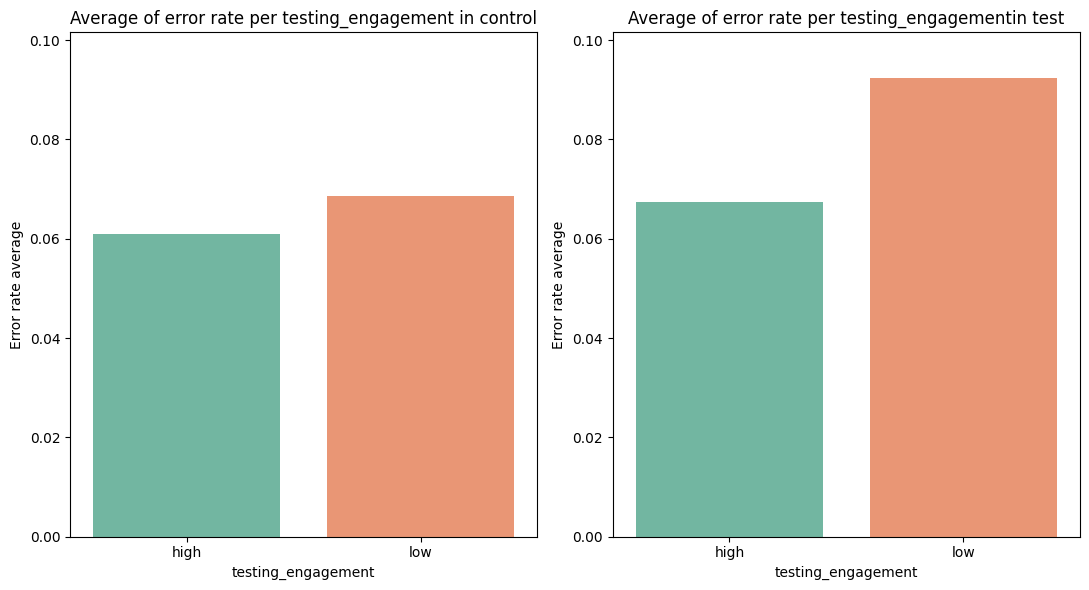

Error rate per balance_level: balance_level
+1M         0.065561
0-100k      0.067469
100-500k    0.070365
500-1M      0.072314
Name: is_error, dtype: float64
Error rate per balance_level: balance_level
+1M         0.092145
0-100k      0.089538
100-500k    0.097235
500-1M      0.095716
Name: is_error, dtype: float64


c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


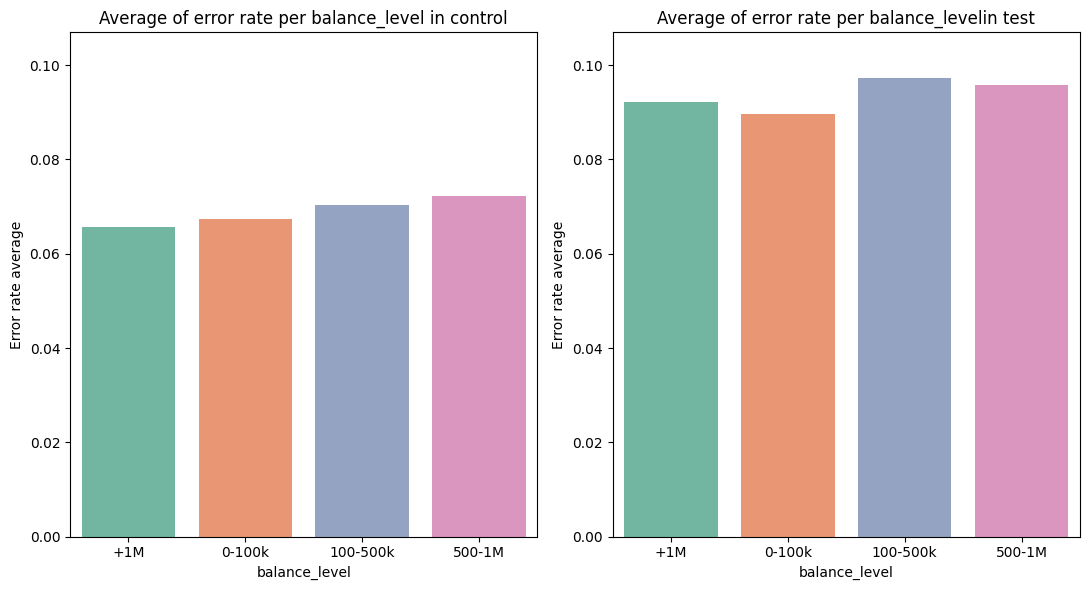

Error rate per tenure: tenure
+50      0.127660
0-5      0.070243
10-15    0.065211
15-20    0.065865
20-50    0.070427
5-10     0.070421
Name: is_error, dtype: float64
Error rate per tenure: tenure
+50      0.061224
0-5      0.087187
10-15    0.093011
15-20    0.096949
20-50    0.098409
5-10     0.087950
Name: is_error, dtype: float64


c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


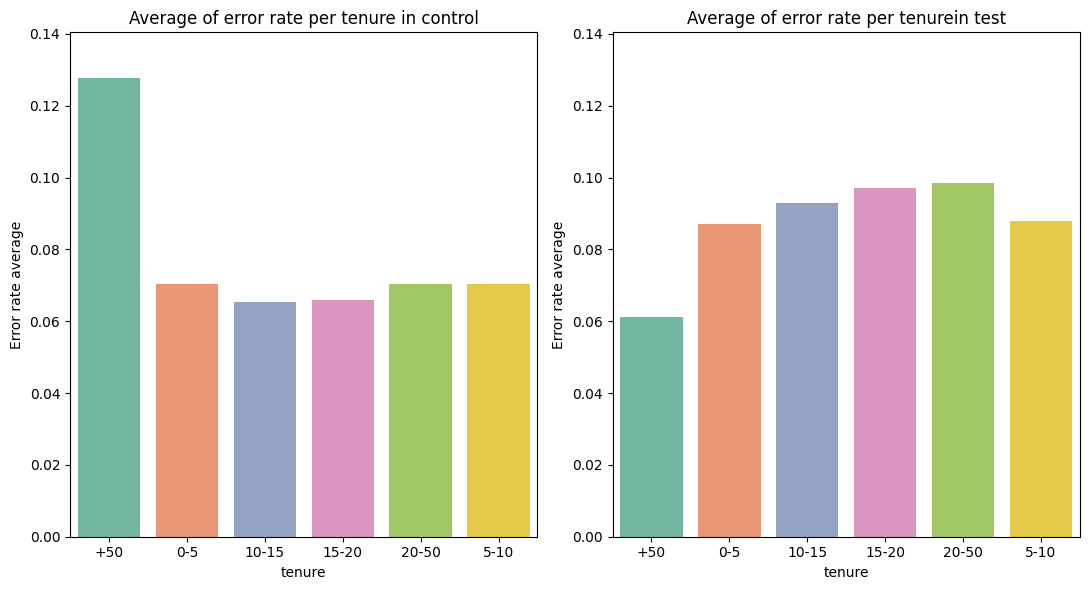

In [17]:
list_category = ['testing_engagement', 'balance_level', 'tenure']
for i in list_category:
    avg_control = f.mean_errors_per_category(df_control_error, i)
    avg_test = f.mean_errors_per_category(df_test_error, i)
    
    f.create_barplot_error(avg_control, avg_test, i)
    
   